## Observations and Insights

## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study= pd.merge(mouse_metadata, study_results)
mouse_study

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

## Summary statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen
mouse_study['Drug Regimen'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

In [25]:
#mean for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mouse_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [26]:
#median for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
mouse_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#variance for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
mouse_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [31]:
#standard deviation for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_standard= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
mouse_standard

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [33]:
# SEM for each drug regimen
mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem= mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
mouse_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [38]:
Summary_Table= pd.DataFrame({"Mean": mouse_mean, "Median": mouse_median, "Variance": mouse_variance, 
                             "Standard Deviation": mouse_standard, "Standard Error of Mean": mouse_sem})
Summary_Table

Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.322552  50.854632  42.351070            6.507770   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of Mean  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.512884  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

## Bar plots

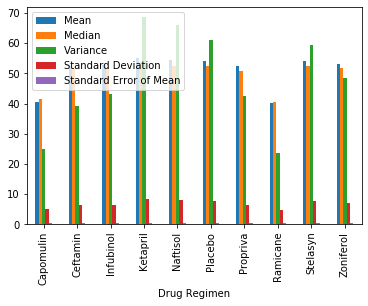

In [59]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Bar_Plot= Summary_Table.plot(kind= 'bar', rot=90)

In [62]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(Summary_Table, )


index= ['Capomulin', "Ceftamin","Infubinol","Ketapril", "Naftisol", 
    "Placebo","Propriva", "Ramicane","Stelasyn", "Zoniferol"]

mean= ['40.675741', '52.591172', '52.884795', '55.235638', '54.331565', 
       '54.033581', '52.322552', '40.216745', '54.233149', '53.236507']

median= ['41.557809', '52.591172', '51.820584', '53.698743', '52.509285', 
        '52.288934', '50.854632', '40.673236', '52.431737', '51.818479']

variance= ['24.947764', '39.290177', '43.128684', '68.553577', '66.173479',
          '61.168083', '42.351070', '23.486704', '59.450562', '48.533355']

standard= ['4.994774', '6.268188', '6.567243', '8.279709', '8.134708',
           '7.821003', '6.507770', '4.846308', '7.710419', '6.966589']
sem= ['0.329346', '0.469821', '0.492236', '0.603860', '0.596466',
     '0.581331', '0.512884', '0.320955', '0.573111',  '0.516398']

plt.bar(index, mean, median, variance, standard, sem,
plt.xlabel("Drugs")
plt.ylabel("measures")
plt.title("Measures of Central Tendency Mouse Data")

plt.xticks(index, x)

plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen